# **Compito Esercitazione 5**

* Import and Data Loading E5
* **Modello Convoluzionale Multilayer**
* Relazione

# Import and Data Loading E5

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [2]:
# Dataset predefinito offerto da keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Aggiunta dimensione canali
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape

# Conversione di tipo
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Conversione in forma categorica
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Modello Convoluzionale Multilayer

## Specifiche di modello:

* Convoluzione bidimensionale con 32 filtri 3$\times$3
* ReLU
* Max pooling bidimensionale con filtro 2$\times$2
* Flattening
* Fully-connected che mappi a 128 dimensioni
* ReLU
* Fully-connected che mappi alla dimensione finale del problema

In [3]:
from keras.layers import Conv2D, MaxPooling2D

mcm = Sequential()
# Convoluzione bidimensionale con 32 filtri 3 × 3
# ReLU
mcm.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# Max pooling bidimensionale con filtro 2 × 2
mcm.add(MaxPooling2D(2)) 
# Flattening
mcm.add(Flatten())
# Fully-connected che mappi a 128 dimensioni
# ReLU
mcm.add(Dense(128, activation='relu'))
# Fully-connected che mappi alla dimensione finale del problema
mcm.add(Dense(num_classes, activation='softmax'))

mcm.summary()
mcm.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.adam(),
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = mcm.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 60s 996us/step - loss: 0.2304 - accuracy: 0.9346 - val_loss: 0.0772 - val_accuracy: 0.9752


In [5]:
score = mcm.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0772314583349973
Test accuracy: 0.9751999974250793


In [6]:
mcm.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.adam(),
             metrics=['accuracy'])
history2 = mcm.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 58s 971us/step - loss: 0.0675 - accuracy: 0.9803 - val_loss: 0.0570 - val_accuracy: 0.9814
Epoch 2/5
60000/60000 [==============================] - 52s 875us/step - loss: 0.0438 - accuracy: 0.9873 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 3/5
60000/60000 [==============================] - 50s 831us/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0442 - val_accuracy: 0.9855
Epoch 4/5
60000/60000 [==============================] - 52s 874us/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 5/5
60000/60000 [==============================] - 50s 840us/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0353 - val_accuracy: 0.9883


In [7]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

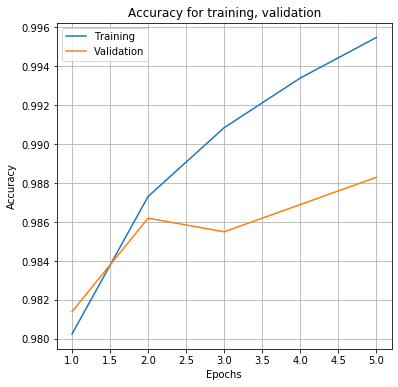

In [8]:
plt.figure(figsize=(6,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
x_plot = list(range(1,n_epochs+1))
plt.plot(x_plot, history2.history['accuracy'])
plt.plot(x_plot, history2.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy for training, validation')
plt.grid()
plt.show

# Relazione

Il Modello Convoluzionale mostra un apprendimento rapido ed efficace già dalla prima epoca. 
Data la semplicità del problema e l'adattamento delle CNNs al riconoscimento di pattern, già alla terza epoca si nota un disaccoppiamento tra loss ed accuracy del validation set e quelle del training set, ossia un overfitting.
Dataset più grandi per cardinalità, numero e varietà intra/interclasse invece richiedono modelli più profondi, con più parametri e non overfittano altrettanto facilmente.